In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


In [3]:
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal 
import random

In [4]:
data = pd.read_csv("/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv",sep=",",)
print("Data dimension: ",data.shape)

Data dimension:  (10000, 6)


In [24]:
data.columns = ['Hours_Studied', 'Previous_Scores', 'Extracurricular_Activities',
       'Sleep_Hours', 'Sample_Question_Papers_Practiced', 'Performance_Index']

### Exploratory Data analysis

In [32]:
# check for missing data
data.isna().sum()

Hours_Studied                       0
Previous_Scores                     0
Extracurricular_Activities          0
Sleep_Hours                         0
Sample_Question_Papers_Practiced    0
Performance_Index                   0
dtype: int64

In [33]:
print (data.iloc[:,0].describe())

count    10000.000000
mean         4.992900
std          2.589309
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Hours_Studied, dtype: float64


Text(0.5, 1.0, 'Hours studied - Boxplot')

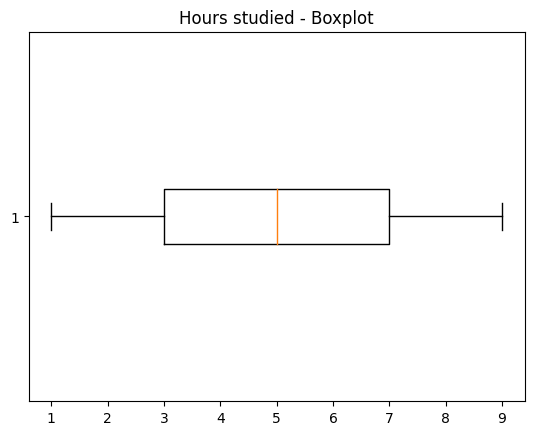

In [34]:
plt.boxplot(data.iloc[:,0],vert=False)
plt.title("Hours studied - Boxplot")

***Hours studied:***  
Average hours studied by a student is 5 hrs  
Almost 50 % of student studied above 5 hrs  
Max hours studied by a student is 9hrs  
Min hour studied by a student is 1 hr  

In [31]:
print(data.iloc[:,1].describe())

count    10000.000000
mean        69.445700
std         17.343152
min         40.000000
25%         54.000000
50%         69.000000
75%         85.000000
max         99.000000
Name: Previous Scores, dtype: float64


Text(0.5, 1.0, 'Previous scores')

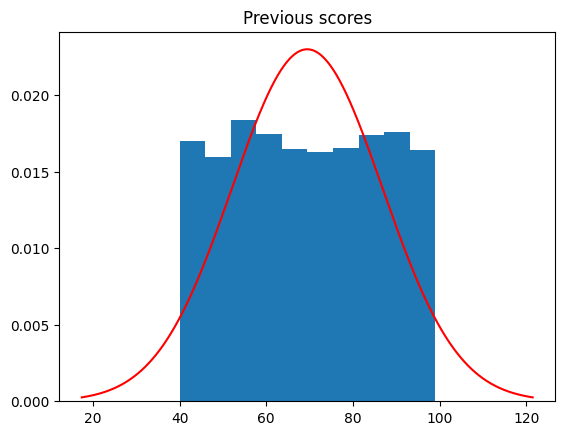

In [48]:
d = data.iloc[:,1]
mu = d.mean()
sigma = d.std()
x_axis = np.linspace(mu-3*sigma,mu+3*sigma,1000)
pdf_density = norm.pdf(x_axis, mu, sigma)

plt.hist(d,density = True)
plt.plot(x_axis,pdf_density,"r")
plt.title("Previous scores")

***Previous scores:***  
Students scored between 40 to 99  
Scores are uniformly distributed

In [65]:
print("Count of students involved in ")
print(data.iloc[:,2].groupby(by=data.iloc[:,2]).count())

Count of students involved in 
Extracurricular Activities
No     5052
Yes    4948
Name: Extracurricular Activities, dtype: int64


0.5052

***Extracurriculars:***  
Almost half the students were not involved in extracurriculars and the other half did


In [27]:
#coding the Yes - 1 and No-0

temp = [1 if data.iloc[i,2]=="Yes" else 0 for i in range(len(data))]
data.Extracurricular_Activities = temp

In [28]:
data.Extracurricular_Activities

0       1
1       0
2       1
3       1
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: Extracurricular_Activities, Length: 10000, dtype: int64

In [60]:
d = data.iloc[:,3]
d.describe()

count    10000.000000
mean         6.530600
std          1.695863
min          4.000000
25%          5.000000
50%          7.000000
75%          8.000000
max          9.000000
Name: Sleep Hours, dtype: float64

Text(0.5, 1.0, 'Sleep Hours')

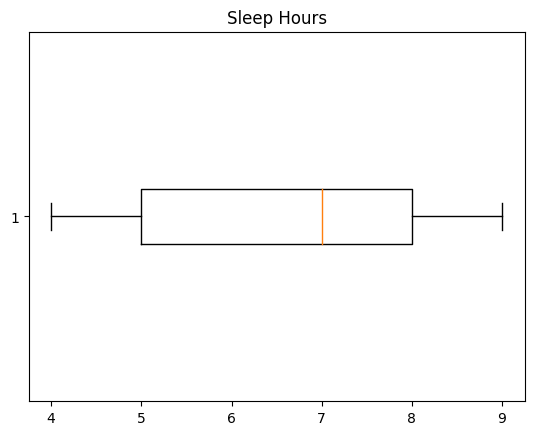

In [61]:
plt.boxplot(d,vert=False)
plt.title("Sleep Hours")

***Sleep Hours***  
Average sleeping hours is 7 hrs  
50 % of students slept less than 7 hrs  
25% of students slept more than 8 hrs  

In [67]:
d = data.iloc[:,4]
d.describe()

count    10000.000000
mean         4.583300
std          2.867348
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Sample Question Papers Practiced, dtype: float64

Text(0.5, 1.0, 'Sample question paper practiced')

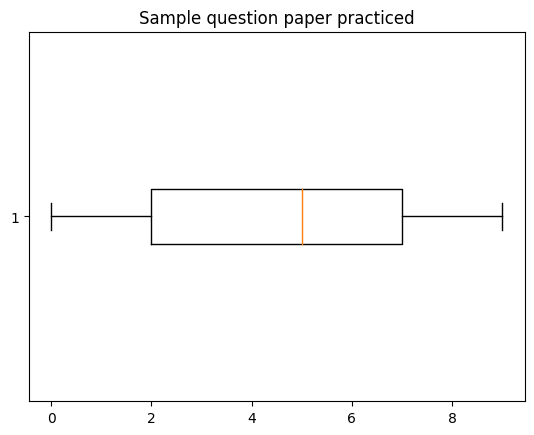

In [69]:
plt.boxplot(d,vert=False)
plt.title("Sample question paper practiced")

***Question paper practiced***  
Paper practiced range from 0 to 9   
Average paper practiced is 5  
25% percent of students practiced more than 7 quesion papers

Text(0.5, 1.0, 'Previous score and Performance Index')

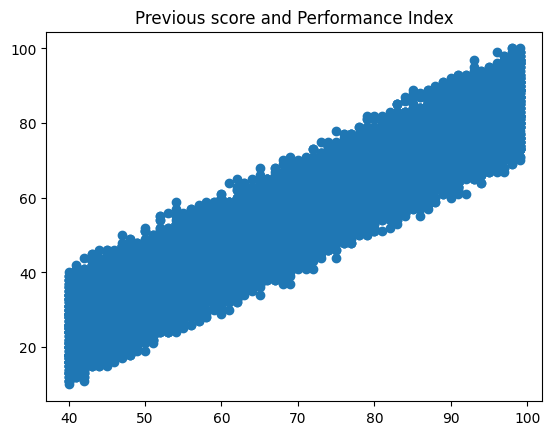

In [56]:
plt.scatter(data.Previous_Scores,data.Performance_Index)
plt.title("Previous score and Performance Index")

#### Baseline model

In [30]:
y_pred = data.loc[:,"Performance_Index"].mean()
mse = data.loc[:,"Performance_Index"].var()
print("Baseline model")
print("Mean squared error: ",mse)

Baseline model
Mean squared error:  369.1223771977198


In [35]:
perm = np.random.permutation(len(data))
train_idx = perm[0:9000]
test_idx = perm[9000:]

train_x = data.iloc[train_idx,:-1]
train_y = data.iloc[train_idx,-1]

test_x = data.iloc[test_idx,:-1]
test_y = data.iloc[test_idx,-1]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(9000, 5)
(9000,)
(1000, 5)
(1000,)


#### Linear regression model

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [39]:
regr = LinearRegression()
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)
mse = mean_squared_error(test_y,y_pred)
print("Liner regression model")
print("Mean square error: ",mse)

Liner regression model
Mean square error:  4.137000801164098


In [55]:
print("Least square line: y = wx + b")

print("w = ",regr.coef_)
print("b = ",regr.intercept_)


Least square line: y = wx + b
w =  [2.85178776 1.01803091 0.62725788 0.4816724  0.19402352]
b =  -34.05322184418339
